In [1]:
import time
from datetime import timedelta
import matplotlib.pyplot as plt

#linear algebra
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv("bank-additional-full.csv")

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
#lấy ra 5 thuộc tính có số lượng giá trị rỗng nhiều nhất
total  = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending= False)
missing = pd.concat([total, percent_2], axis =1, keys = ['Total', '%'])
missing.head()

,Total,%
age,0,0.0
campaign,0,0.0
nr.employed,0,0.0
euribor3m,0,0.0
cons.conf.idx,0,0.0


không thấy có dữ liệu bị rỗng 

<AxesSubplot:title={'center':'Deposit value counts'}>

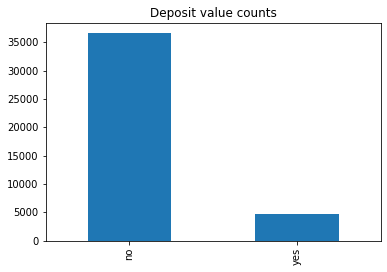

In [7]:
value_counts = df['y'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

In [8]:
temp = value_counts/df['y'].count()
temp

no     0.887346
yes    0.112654
Name: y, dtype: float64

-Thống kê cho thấy có 88.7% khách hàng không đăng kí và 11.3% khách hàng đăng kí tiền gửi 
kì hạn

In [9]:
df1= df.replace('unknown', np.nan)
df1.dropna(inplace=True)
df1.reset_index(drop= True, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [10]:
count_unknown = df.count()- df1.count()
count_unknown

age               10700
job               10700
marital           10700
education         10700
default           10700
housing           10700
loan              10700
contact           10700
month             10700
day_of_week       10700
duration          10700
campaign          10700
pdays             10700
previous          10700
poutcome          10700
emp.var.rate      10700
cons.price.idx    10700
cons.conf.idx     10700
euribor3m         10700
nr.employed       10700
y                 10700
dtype: int64

-xoá các thuộc tính unknown của bộ dữ liệu 

In [11]:
df.drop('duration', axis = 1, inplace= True)
df.drop("pdays", axis= 1, inplace = True)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- loại các thuộc tính duration và pdays bởi vì:
    thuộc tính duration đa số các cuộc gọi đều bằng 0 tại vì không liên hệ được 
    thuộc tính pdays đa số các khách hàng không được liên hệ 

In [12]:
for dataset in [df1]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 32, 'age' ] = 0
    dataset.loc[(dataset['age'] > 32)  & (dataset['age'] <= 38 ), 'age' ] = 1
    dataset.loc[(dataset['age'] > 38)  & (dataset['age'] <= 47 ), 'age' ] = 2
    dataset.loc[dataset['age'] > 47 , 'age' ] = 3
    

In [13]:
df1['age'].value_counts()

0    9373
1    7918
2    6882
3    6315
Name: age, dtype: int64

-chuyển đổi dữ liệu về kiểu int và chia các khách hàng thành 4 nhóm tuổi khách hàng 

In [14]:
#gộp các dòng dữ liệu basic.9y basic.6y basic.4y thành basic
df1['education'] = np.where(df1['education'] == 'basic.9y', 'basic', df1['education'])
df1['education'] = np.where(df1['education'] == 'basic.6y', 'basic', df1['education'])
df1['education'] = np.where(df1['education'] == 'basic.4y', 'basic', df1['education'])


In [15]:
df1['education'].unique()

array(['basic', 'high.school', 'professional.course', 'university.degree',
       'illiterate'], dtype=object)

In [16]:
#Chuyển các thuộc tính object sang label encoder

data = df1.copy()
accuracies = {}
times = {}
le = LabelEncoder()
for col in data.columns[[i == object for i in data.dtypes]]:
    data.loc[:, col] = le.fit_transform(data[col])

data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,7,1,1,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,0,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,7,1,1,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,0,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,0,9,2,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,0,7,2,1,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,0,7,2,1,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,0,1,2,1,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,3,3,0,0,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
df1['age'].value_counts()

0    9373
1    7918
2    6882
3    6315
Name: age, dtype: int64

0    9373
1    7918
2    6882
3    6315
Name: age, dtype: int64


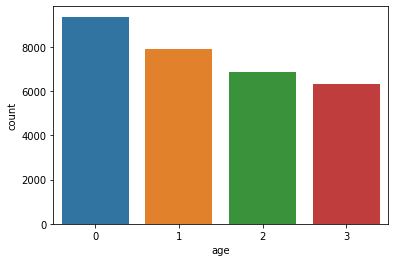

In [18]:
print(df1.age.value_counts())
ax= sns.countplot(data=df1, x='age')

-từ biểu đồ ta nhận xét được khách hàng từ độ tuổi dưới 32 thì nhiều nhất chiếm đến 9373
-và các số lượng khách hàng giảm dần theo độ tuổi

married     17492
single       9443
divorced     3553
Name: marital, dtype: int64
married     0.573734
single      0.309728
divorced    0.116538
Name: marital, dtype: float64


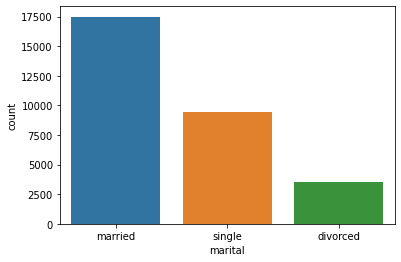

In [19]:
marital_value = df1.marital.value_counts()
marital_plot= sns.countplot(data=df1, x='marital')
print(marital_value)
print(marital_value/ df1.marital.count())

-từ biểu đồ ta nhận xét được khách hàng đa số là những người đã kết hôn chiếm đến 0.57% và độc thân chiếm 0.3% ...

yes    16521
no     13967
Name: housing, dtype: int64


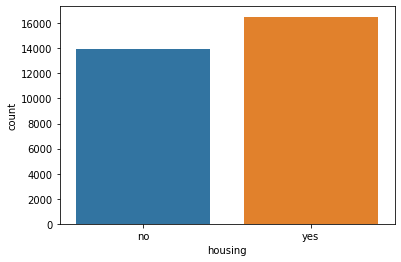

In [20]:
housing_value = df1.housing.value_counts()
print(housing_value)
housing_plot= sns.countplot(data=df1, x='housing')

-nhìn vào đồ thị thấy được khách hàng có khoản vay nhà gần như bằng nhau 

no     25720
yes     4768
Name: loan, dtype: int64


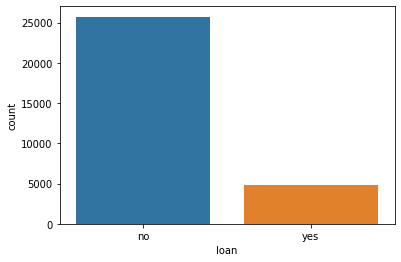

In [21]:
loan_value = df1.loan.value_counts()
print(loan_value)
loan_plot= sns.countplot(data=df1, x='loan')


-Thấy một yếu tố quan trọng nữa là khách hàng đa số có khoản nợ cá nhân

<AxesSubplot:xlabel='duration', ylabel='y'>

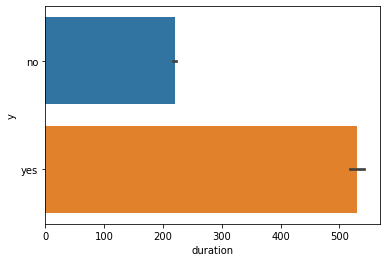

In [22]:
register ="register"
not_register = "not register"
married  = df1[df1['marital'] == 'married']
single   = df1[df1['marital'] == 'single']
divorced = df1[df1['marital'] == 'divorced']

sns.barplot(x='duration', y='y', data =df1)

- thời lượng cuộc gọi mà nhân viên gọi cho khách hàng càng cao thì tỉ lệ đăng kí tiền gửi kì hạn cũng nhiều hơn 

<AxesSubplot:xlabel='marital', ylabel='y'>

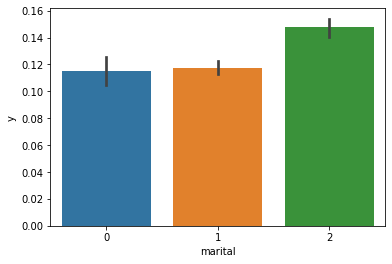

In [23]:
sns.barplot(x='marital', y='y', data =data)

In [24]:
married_y =  pd.DataFrame(married['y'].value_counts()).T
married_y


,no,yes
y,15436,2056


In [25]:
# plt.bar(married_y.columns.values, married_y, align='center', alpha=0.5)
# plt.ylabel('Usage')
# plt.title('married is regiser or not ')
# plt.show()

<AxesSubplot:>

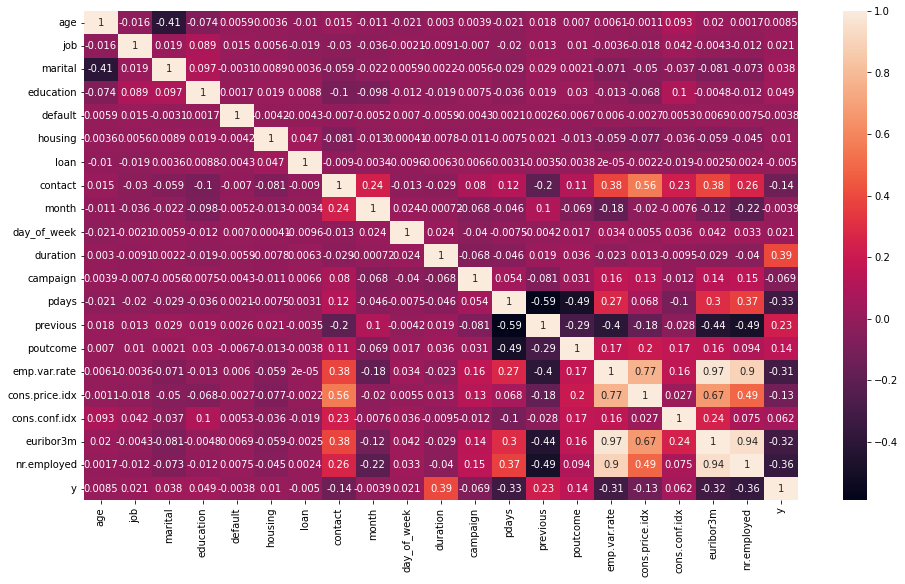

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(method='pearson'), annot=True)

# -Thuật toán cây quyết định

In [27]:
x=data.drop('y', axis=1)
y=data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

-tachs dữ liệu thành 2 biến , 1 biến chứa thuộc tính bình thường, 1 biến chứa thuộc tính quyết định 
-chia tập dữ liệu thành 2 phần 70% huấn luyện , 30% kiểm thử

In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
start_tr= time.time()
tree_pred = clf.fit(x_train, y_train).predict(x_test)
end_tr = time.time()
times['id3'] = timedelta(seconds= round(end_tr -start_tr, 4)).total_seconds()
print("time: ", times['id3'])

time:  0.1087


In [29]:
tree_score = metrics.accuracy_score(y_test, tree_pred)
accuracies['id3'] = tree_score
print("accuracy: ", tree_score)
print("report",metrics.classification_report(y_test, tree_pred))

accuracy:  0.8782114354433147
report               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7974
           1       0.52      0.54      0.53      1173

    accuracy                           0.88      9147
   macro avg       0.73      0.73      0.73      9147
weighted avg       0.88      0.88      0.88      9147



độ chính xác : 87.7%
độ nhạy 93%
độ phủ : 35%
    

# - CLUSTERING

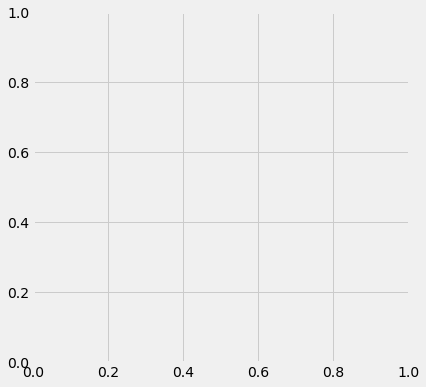

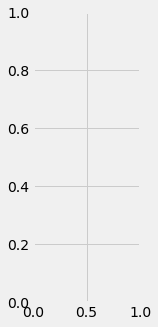

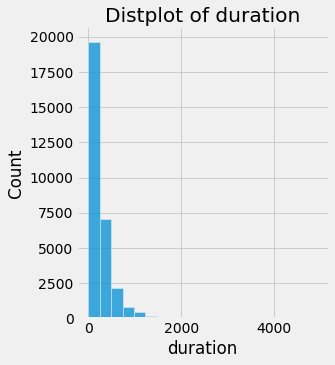

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['age', 'duration']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.displot(df1[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

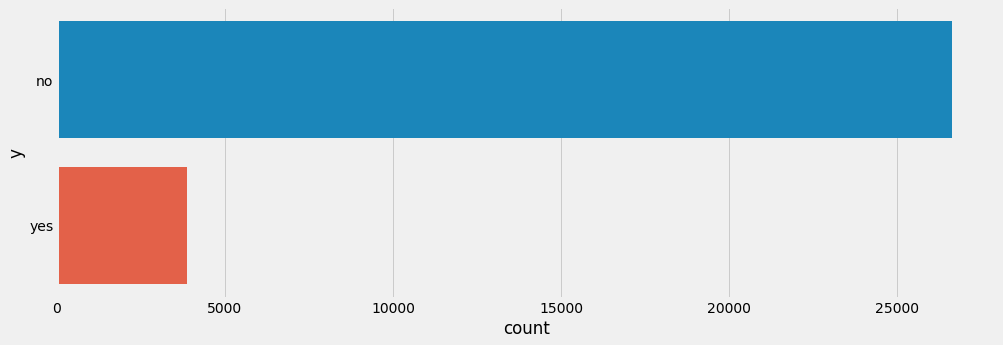

In [31]:
# Thống kê số mẫu dữ liệu theo Kết quả ý kiến khách hàng (y)

plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'y', data = df1)
plt.show()

In [32]:
# Từ dữ liệu thống kê được, ta thấy: Phần lớn khách hàng không đăng ký khoản tiền gửi có kỳ hạn.

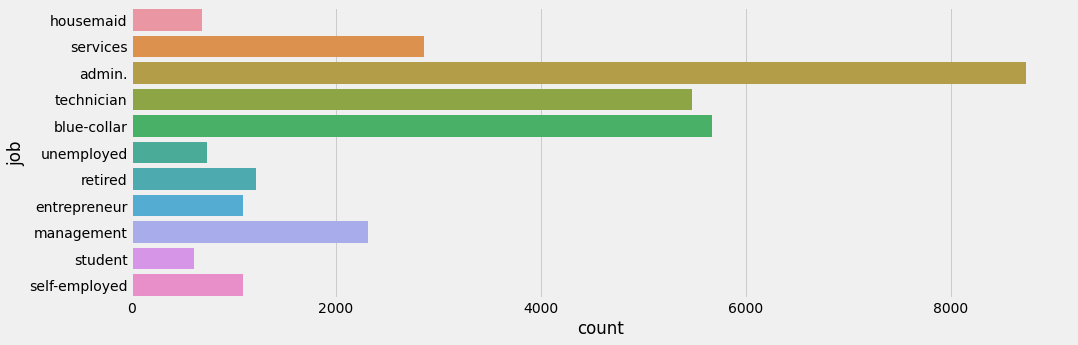

In [33]:
# Thống kê số mẫu dữ liệu theo Nghề nghiệp(job)

plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'job', data = df1)
plt.show()

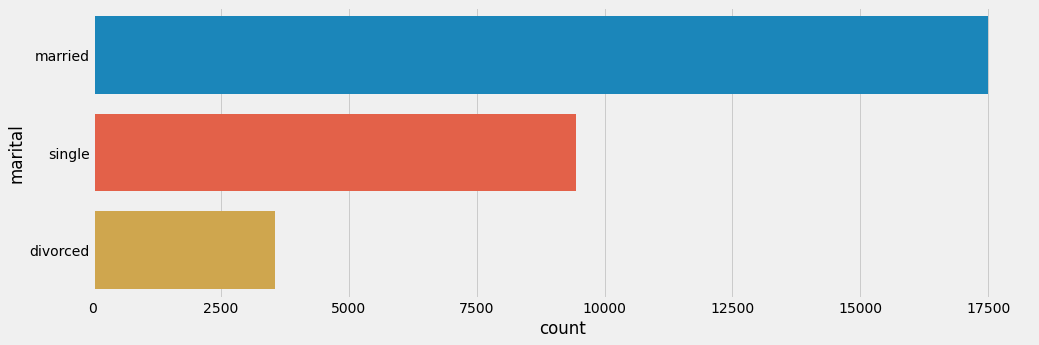

In [34]:
# Thống kê số mẫu dữ liệu theo tình trạng hôn nhân(marital)

plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'marital', data = df1)
plt.show()

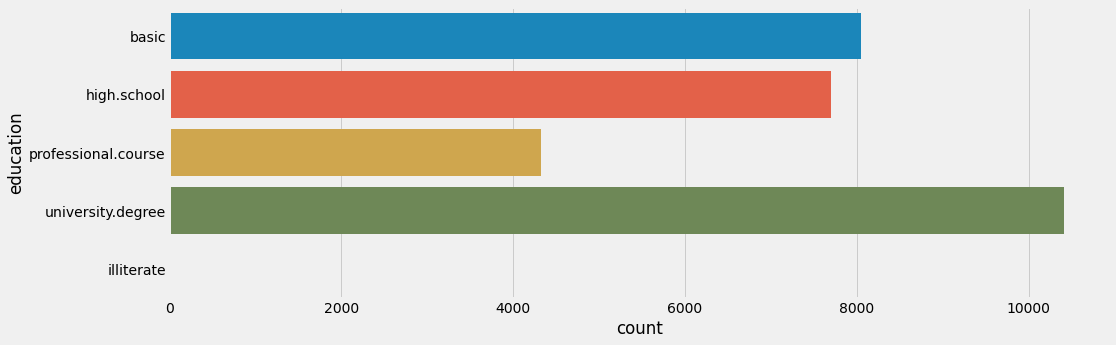

In [35]:
# Thống kê số mẫu dữ liệu theo học vấn(education)

plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'education', data = df1)
plt.show()

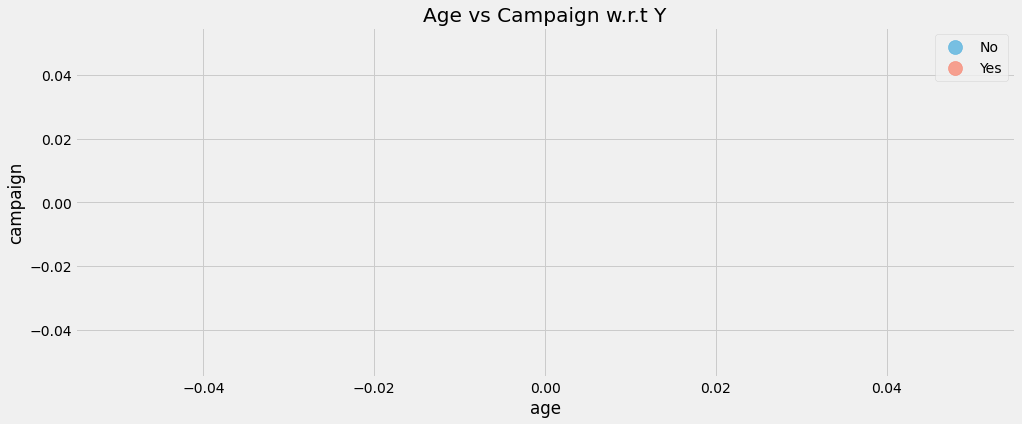

In [36]:
plt.figure(1, figsize = (15, 6))
for y in ['No', 'Yes']:
    plt.scatter(x = 'age', y = 'campaign', data = df1[df1['y'] == y], s = 200, alpha = 0.5, label = y)
plt.xlabel('age'), plt.ylabel('campaign')
plt.title('Age vs Campaign w.r.t Y')
plt.legend()
plt.show()

In [37]:
# Khảo sát việc gom cụm theo thuộc tính Tuổi(age) và Số lượng địa chỉ liên hệ được trong chiến dịch/1 khách hàng(campaign)  

X1 = df1[['age', 'campaign']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

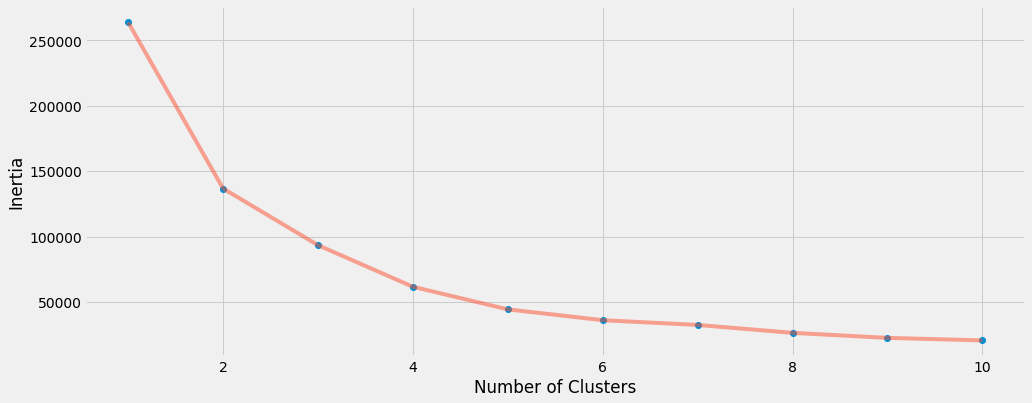

In [38]:
# Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [39]:
# Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4(k = 4)

In [40]:
# Tiến hành gom cụm dữ liệu Tuổi(age) và Số lượng địa chỉ liên hệ được trong chiến dịch/1 khách hàng(campaign)

algorithm = KMeans(n_clusters = 4, init = 'random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

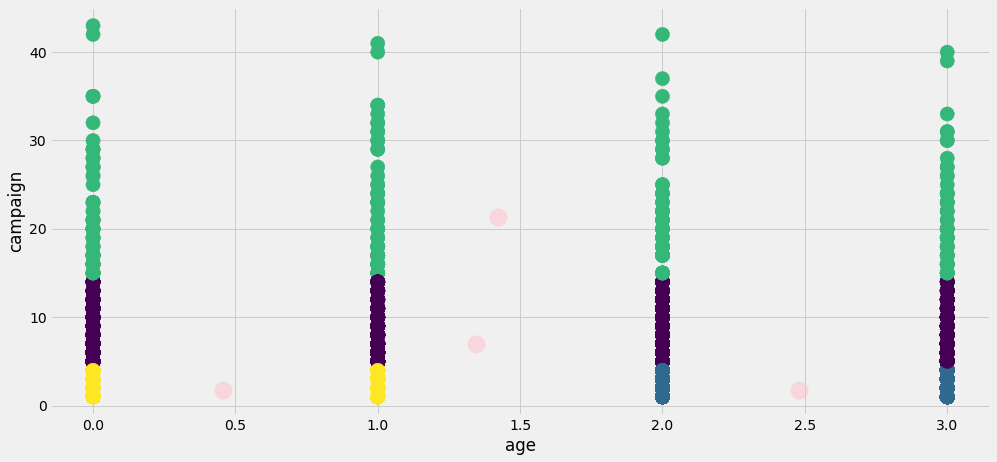

In [41]:
# Biểu diễn kết quả gom cụm bằng biểu đồ

plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'age', y = 'campaign', data = df1, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s = 300, c = 'pink', alpha = 0.5)
plt.xlabel('age'), plt.ylabel('campaign')
plt.show()

In [42]:
# Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu(Silhouette Coefficient : [0-1]) : Càng gần 1 thì chất lượng phân cụm càng tốt.

metrics.silhouette_score(X1, labels1, metric = 'euclidean')

0.4566674839919429

In [43]:
# Khảo sát việc gom cụm theo thuộc tính Tuổi(age) và Thời lượng liên hệ cuối cùng(duration)  

X2 = df1[['age', 'duration']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(n_clusters = n, init = 'random')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

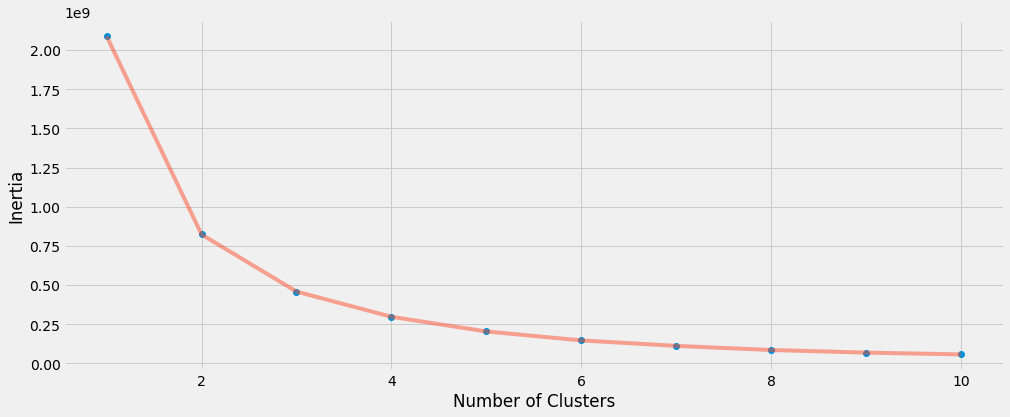

In [44]:
# Vẽ biểu đồ biểu diễn giá trị Inertia, theo từng cách gom cụm k

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [45]:
# Từ biểu đồ trên có thể xác nhận, số cụm tối ưu là 4(k = 4)

In [46]:
# Tiến hành gom cụm dữ liệu Tuổi(age) và Thời lượng liên hệ cuối cùng(duration) 

algorithm = KMeans(n_clusters = 4, init = 'random')
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

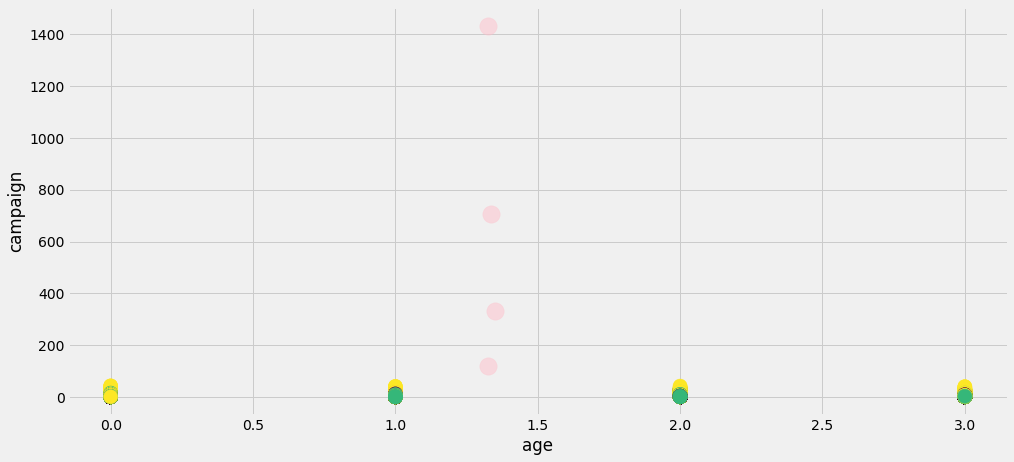

In [47]:
# Biểu diễn kết quả gom cụm bằng biểu đồ

plt.figure(1, figsize = (15, 7))
plt.clf()
plt.scatter(x = 'age', y = 'campaign', data = df1, c = labels2, s = 200)
plt.scatter(x = centroids2[: , 0], y = centroids2[: , 1], s = 300, c = 'pink', alpha = 0.5)
plt.xlabel('age'), plt.ylabel('campaign')
plt.show()

In [48]:
# Đánh giá kết quả gom cụm bằng Hệ số Dáng điệu(Silhouette Coefficient : [0-1]) : Càng gần 1 thì chất lượng phân cụm càng tốt.

metrics.silhouette_score(X2, labels2, metric = 'euclidean')

0.5981033076546669

In [49]:
Quyfnh PhƯơng Xinh Đẹp

SyntaxError: invalid syntax (3305909916.py, line 1)